In [ ]:
# Build an Artificial Neural Network (ANN) to classify handwritten digits (0–9) using the sklearn Digits dataset.

In [5]:
# Libraries & Environment Setup
# Numerical computing
import numpy as np

# Data handling & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Deep Learning (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [6]:
# Load digits dataset from sklearn
digits = load_digits()

# Features (images flattened into vectors)
X = digits.data        # shape: (1797, 64)

# Labels (0 to 9)
y = digits.target      # shape: (1797,)

In [7]:
print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (1797, 64)
Label shape: (1797,)


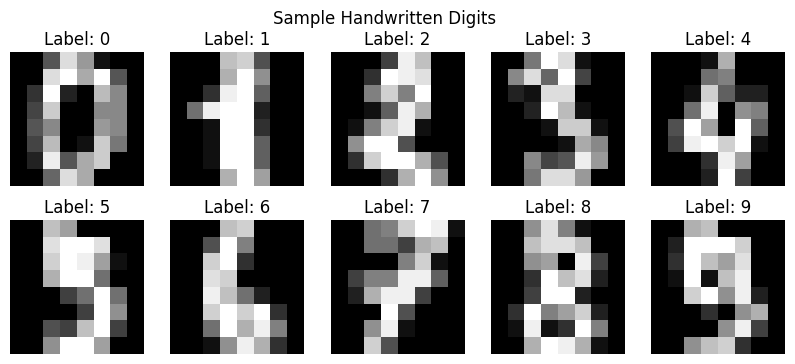

In [8]:
# EDA-  1.Visualize Sample Digits

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.suptitle("Sample Handwritten Digits")
plt.show()


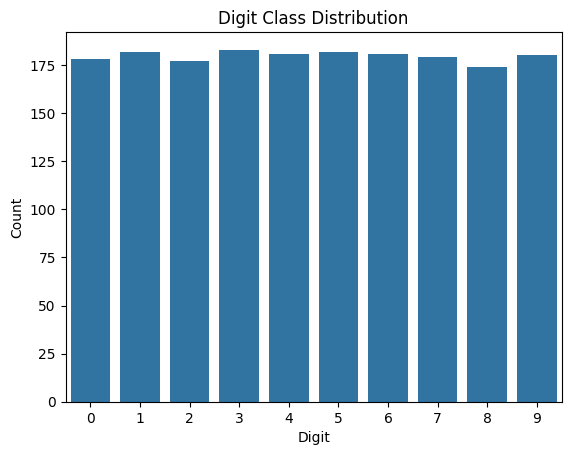

In [9]:
#  EDA 2.Class Distribution
sns.countplot(x=y)
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


In [10]:
# Data Preprocessing -1. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
#  Data Preprocessing -2.Feature Scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Data Preprocessing -3. One-Hot Encode Labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [14]:
# ANN Model Architecture
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(
    units=128,            # Number of neurons
    activation='relu',    # Non-linear activation
    input_shape=(64,)     # 64 pixel features
))

# Second hidden layer
model.add(Dense(
    units=64,
    activation='relu'
))

# Output layer
model.add(Dense(
    units=10,             # One neuron per digit class
    activation='softmax'  # Converts scores → probabilities
))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the Model
model.compile(
    optimizer='adam',                 # Adaptive learning rate
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


In [16]:
# Train the ANN
history = model.fit(
    X_train,
    y_train_cat,
    validation_split=0.1,  # 10% of training used for validation
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4136 - loss: 1.9105 - val_accuracy: 0.8681 - val_loss: 0.8064
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.5617 - val_accuracy: 0.9375 - val_loss: 0.3227
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.2167 - val_accuracy: 0.9444 - val_loss: 0.2148
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.1321 - val_accuracy: 0.9653 - val_loss: 0.1637
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0866 - val_accuracy: 0.9444 - val_loss: 0.1535
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.0544 - val_accuracy: 0.9653 - val_loss: 0.1270
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0404 - val_accuracy: 0.9653 - val_loss: 0.1189
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0310 - val_accuracy: 0.9653 - val_loss

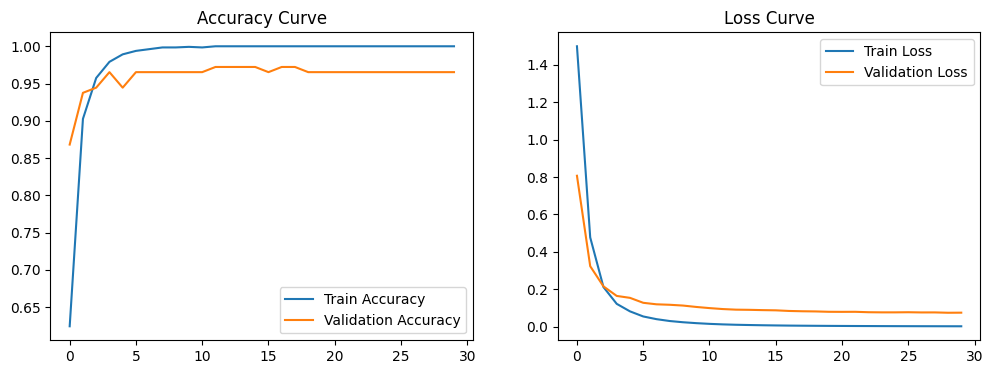

In [17]:
# Training Curves (Accuracy & Loss)visulization
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()


In [19]:
#Model Evaluation 1. Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [20]:
# Model Evaluation 1. Accuracy score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9777777777777777


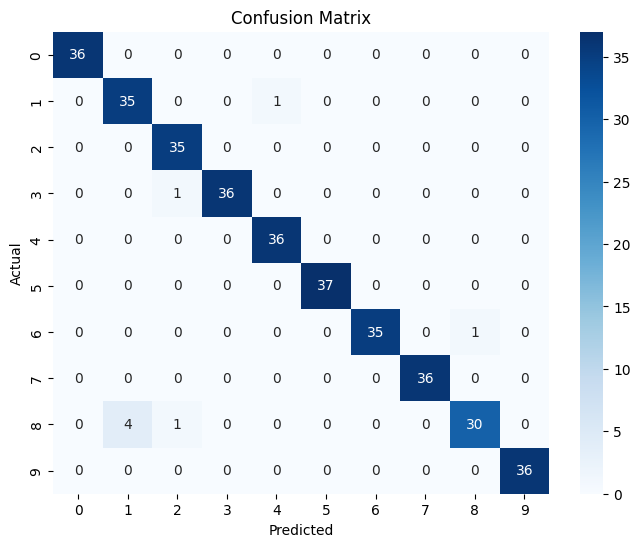

In [21]:
# Confusion Matrix-Diagonal → correct predictions,Off-diagonal → misclassifications

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# Classification Report

#Precision: How many predicted positives are correct
#Recall: How many actual positives were detected
#F1-score: Balance of precision & recall
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.93        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      0.86      0.91        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

